#### Notebook by Bruno Pasini

github.com/brunompasini

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## How the data looks like

#### Some Definitions
Survived: 0 = No; 1 = Yes  
SibSp: Number of siblings and spouses aboard  
ParCh: Number of parents and children aboard  
Embarked: C = Cherbourg; Q = Queenstown; S = Southampton  

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#print(train.info())
#print("-"*20 +"//"+"-"*20)
#print(test.info())

##### Null values

In [6]:
print(train.isnull().sum())
print("-"*20 +"//"+"-"*20)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------//--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
data = [train, test]

In [8]:
for el in data:
    el['Age'].fillna(el['Age'].median(), inplace=True)
    el['Fare'].fillna(el['Fare'].median(), inplace=True)
    el['Embarked'].fillna(el['Embarked'].mode()[0], inplace=True)
    el.drop(['Cabin', 'Ticket', 'Name', 'SibSp',	'Parch'], axis=1, inplace=True)

In [9]:
# Droping Cabin and Ticket, both non-numerical values since Fare and Class covers the Economic Status
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


### Will be using a NN to predict

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, RMSprop

#### Creating callbacks

In [11]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epock,logs={}):
    if (logs.get('accuracy')>0.8):
      print("\nAccuracy is over 80%")
      self.model.stop_training = True

callbacks = myCallback()

#### NN

In [12]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,0,1,0,0,1
1,2,1,1,38.0,71.2833,1,0,1,0,0
2,3,1,3,26.0,7.9250,1,0,0,0,1
3,4,1,1,35.0,53.1000,1,0,0,0,1
4,5,0,3,35.0,8.0500,0,1,0,0,1


In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(9,)),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              40960     
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               5

In [14]:
history = model.fit(train.drop('Survived',axis=1), train["Survived"], epochs=100, batch_size=10, verbose=1, callbacks=[callbacks])

Epoch 1/100
90/90 [==============================] - 1s 8ms/step - loss: 2.2881 - accuracy: 0.4893
Epoch 2/100
90/90 [==============================] - 1s 9ms/step - loss: 0.7325 - accuracy: 0.5780
Epoch 3/100
90/90 [==============================] - 1s 9ms/step - loss: 0.6959 - accuracy: 0.5971
Epoch 4/100
90/90 [==============================] - 1s 9ms/step - loss: 0.6962 - accuracy: 0.6341
Epoch 5/100
90/90 [==============================] - 1s 8ms/step - loss: 0.6644 - accuracy: 0.6341
Epoch 6/100
90/90 [==============================] - 1s 9ms/step - loss: 0.6499 - accuracy: 0.6655
Epoch 7/100
90/90 [==============================] - 1s 9ms/step - loss: 0.6572 - accuracy: 0.6521
Epoch 8/100
90/90 [==============================] - 1s 8ms/step - loss: 0.6479 - accuracy: 0.6790
Epoch 9/100
90/90 [==============================] - 1s 8ms/step - loss: 0.6502 - accuracy: 0.6678
Epoch 10/100
90/90 [==============================] - 1s 8ms/step - loss: 0.6305 - accuracy: 0.6813
Epoch 11/

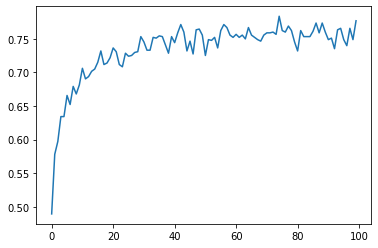

In [15]:
plt.plot(history.history['accuracy'])

In [16]:
testID = test["PassengerId"]

In [19]:
predict = model.predict(test)
predictions = [0 if el < 0.5 else 1 for el in predict]
result = pd.DataFrame({'PassengerId': testID, 'Survived': predictions})
result.to_csv('result.csv', index=False)

In [18]:
# Got a 0.73923 score on Kaggle